[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-03.ipynb)


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/DataStudyGSHJT/boostcourse-ds-511/master/data/diabetes.csv")
df.shape

(768, 9)

In [3]:
# 데이터셋을 미리보기 합니다.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 학습과 예측에 사용할 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
X.shape

(768, 6)

In [14]:
y = df['Outcome']
y.shape

(768,)

In [15]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 6), (614,))

In [17]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 6), (154,))

## 머신러닝 알고리즘 사용하기

In [18]:
# DecisionTree 를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

### 최적의 max_depth 값 찾기

In [19]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 75.97402597402598
4 69.48051948051948
5 79.22077922077922
6 74.02597402597402
7 74.02597402597402
8 74.02597402597402
9 69.48051948051948
10 74.67532467532467
11 74.02597402597402


### Grid Search

* https://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [20]:
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12), 
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [21]:
clf.best_params_

{'max_depth': 3, 'max_features': 0.7}

In [22]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=0.7, random_state=42)

In [23]:
clf.best_score_

0.7606424097027855

In [24]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.005334,0.000963,0.003444,0.001193,3,0.7,"{'max_depth': 3, 'max_features': 0.7}",0.699187,0.804878,0.764228,0.739837,0.795082,0.760642,0.038381,1
3,0.004973,0.000297,0.002873,0.000102,3,0.9,"{'max_depth': 3, 'max_features': 0.9}",0.699187,0.804878,0.764228,0.731707,0.795082,0.759016,0.039387,2
1,0.004878,0.000670,0.002870,0.000124,3,0.5,"{'max_depth': 3, 'max_features': 0.5}",0.699187,0.813008,0.764228,0.731707,0.778689,0.757364,0.039092,3
8,0.004909,0.000209,0.003235,0.000757,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.731707,0.804878,0.747967,0.723577,0.778689,0.757364,0.030333,3
13,0.005269,0.000240,0.002850,0.000077,5,0.9,"{'max_depth': 5, 'max_features': 0.9}",0.723577,0.772358,0.780488,0.723577,0.754098,0.750820,0.023829,5


In [25]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [26]:
clf.score(X_test, y_test)

0.7597402597402597

### Random Search
<img src="https://i.imgur.com/N17CPGj.png">

출처 : http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [27]:
model

DecisionTreeClassifier(random_state=42)

In [28]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([13, 13,  6,  4,  9, 12, 17,  3, 11, 10])

In [29]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [30]:
param_distributions = {"max_depth" :max_depth, 
                       "max_features": max_features,
                       "min_samples_split" : list(range(2, 7))
                      }
param_distributions

{'max_depth': array([13, 13,  6,  4,  9, 12, 17,  3, 11, 10]),
 'max_features': array([0.82715405, 0.97139459, 0.89432981, 0.76363756, 0.93555571,
        0.8697405 , 0.71463653, 0.92573747, 0.92252116, 0.97569737,
        0.80034601, 0.7826765 , 0.82594515, 0.89449266, 0.72526734,
        0.77527196, 0.83191805, 0.92193417, 0.81309915, 0.81424899,
        0.71413868, 0.78411004, 0.91766867, 0.85142583, 0.91033378,
        0.87782927, 0.85363712, 0.99215007, 0.71563754, 0.77022944,
        0.8909959 , 0.73134028, 0.81522884, 0.83946417, 0.78901805,
        0.952718  , 0.90001275, 0.92743976, 0.70954967, 0.70027756,
        0.8462103 , 0.70746073, 0.92115331, 0.93732482, 0.96282565,
        0.90500172, 0.80889167, 0.88914153, 0.96563058, 0.71261005,
        0.921624  , 0.79796406, 0.79978767, 0.71096159, 0.79610906,
        0.89455949, 0.75529647, 0.97012101, 0.9342777 , 0.86076785,
        0.71193285, 0.8048067 , 0.72418446, 0.76217291, 0.71947699,
        0.85756081, 0.79145394, 0.777

In [31]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                  )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([13, 13,  6,  4,  9, 12, 17,  3, 11, 10]),
                                        'max_features': array([0.82715405, 0.97139459, 0.89432981, 0.76363756, 0.93555571,
       0.8697405 , 0.71463653, 0.92573747, 0.92252116, 0.97569737,
       0.80034601, 0.7826765 , 0.82594515, 0.89449266, 0.72526734,
       0...
       0.76581966, 0.98648432, 0.92953461, 0.89894473, 0.70161247,
       0.90579115, 0.9674074 , 0.84229004, 0.80874635, 0.91236668,
       0.77087266, 0.82606879, 0.92143501, 0.94523201, 0.91290532,
       0.75441529, 0.80375186, 0.75270564, 0.80976958, 0.98860135,
       0.83068743, 0.87069474, 0.88745945, 0.84247226, 0.96716381,
       0.88537643, 0.88255852, 0.74212986, 0.886111  , 0.96677158]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [32]:
clf.best_params_

{'min_samples_split': 6, 'max_features': 0.8142489909608482, 'max_depth': 3}

In [33]:
clf.best_score_

0.7606424097027855

In [34]:
clf.score(X_test, y_test)

0.7597402597402597

In [35]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
499,0.008949,0.002386,0.006591,0.003524,2,0.800346,3,"{'min_samples_split': 2, 'max_features': 0.800...",0.699187,0.804878,0.764228,0.739837,0.795082,0.760642,0.038381,1
537,0.004970,0.001371,0.002692,0.000149,4,0.78411,3,"{'min_samples_split': 4, 'max_features': 0.784...",0.699187,0.804878,0.764228,0.739837,0.795082,0.760642,0.038381,1
552,0.004192,0.000113,0.002540,0.000073,5,0.74213,3,"{'min_samples_split': 5, 'max_features': 0.742...",0.699187,0.804878,0.764228,0.739837,0.795082,0.760642,0.038381,1
185,0.004894,0.000959,0.002654,0.000111,2,0.725267,3,"{'min_samples_split': 2, 'max_features': 0.725...",0.699187,0.804878,0.764228,0.739837,0.795082,0.760642,0.038381,1
579,0.004296,0.000038,0.002698,0.000077,3,0.770873,3,"{'min_samples_split': 3, 'max_features': 0.770...",0.699187,0.804878,0.764228,0.739837,0.795082,0.760642,0.038381,1


## 학습과 예측하기

In [36]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
feature_names = X_train.columns.tolist()

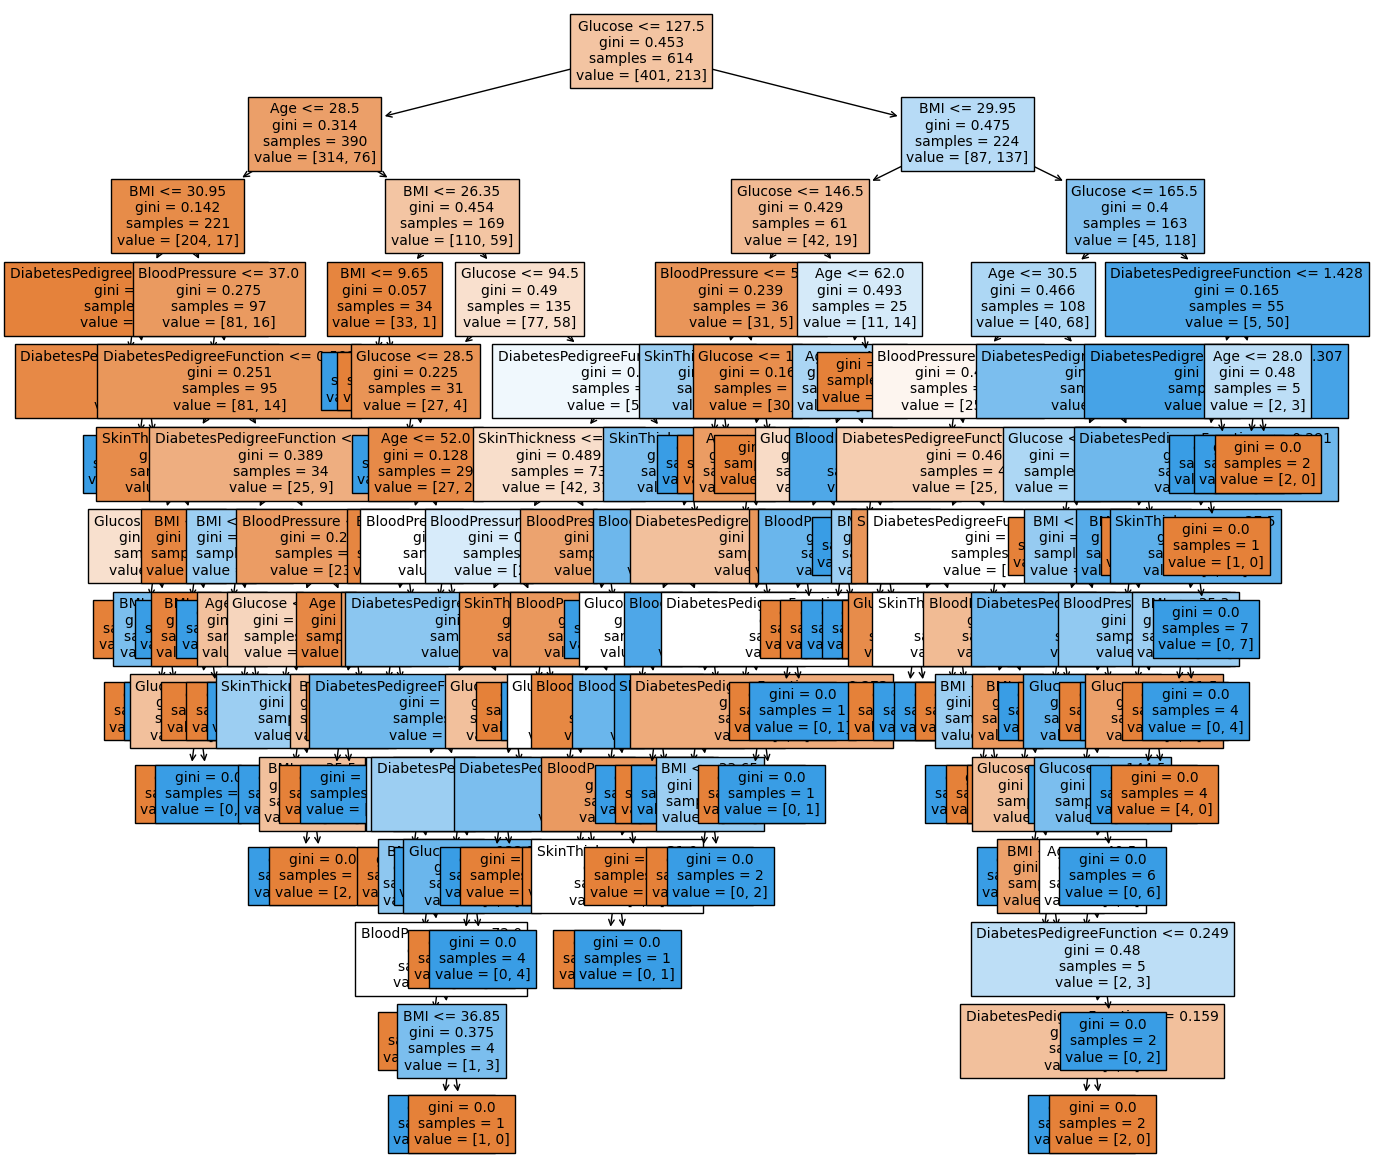

In [38]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [39]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

## 정확도(Accuracy) 측정하기

In [40]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.

abs(y_predict - y_test).sum()

39

In [41]:
# accuracy score를 구합니다.

accuracy_score(y_test, y_predict) * 100

74.67532467532467